# Understand the Combined Data
Let's understand what we have to work with.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_pickle("../processed_data/combined_dataset.pkl")
data.sample(frac=1).head()

,acvalue_target,activity_target,target,tmprss2_vs_target_spearman_r,acvalue_scaled_to_tmprss2,cid,morgan_fingerprint
381,816.000,Inactive,KLKB1,NaN,NaN,10742217,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
75,208.000,Inactive,TMPRSS6,0.708384,5.612550,71458620,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
71,11.000,Active,KLKB1,NaN,NaN,9912771,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
6,0.230,Active,KLKB1,NaN,NaN,11292119,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
243,0.087,Active,ST14,0.769880,0.116046,25030928,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Histograms

### Bulk Data

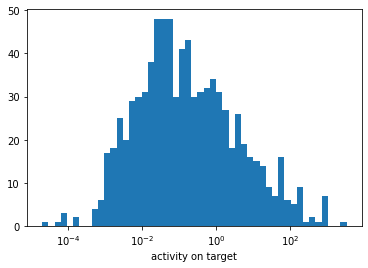

In [6]:
plt.hist(data.acvalue_target,
         bins=np.logspace(np.log10(data.acvalue_target.min()), np.log10(data.acvalue_target.max()), 50),
         label='All Labels')
plt.gca().set_xscale("log")
plt.xlabel('activity on target')
plt.show()

### Discriminated by target

In [7]:
data.groupby('target').size()

target
KLKB1        384
ST14         246
TMPRSS11D     33
TMPRSS2       92
TMPRSS6       87
dtype: int64

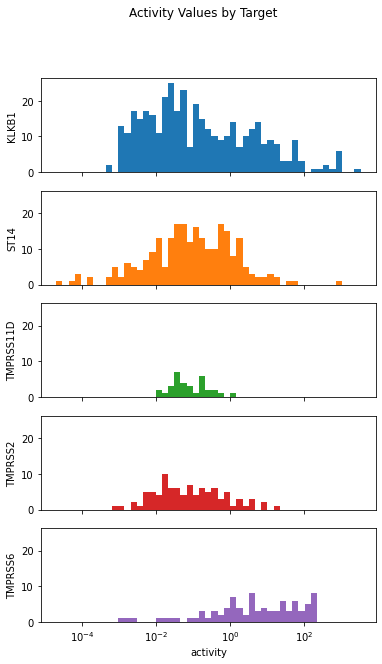

In [8]:
targets = data.groupby('target').acvalue_target.apply(list).to_dict()
fig, axes = plt.subplots(len(targets), 1, sharey=True, sharex=True)
fig.set_figheight(10)
axes = iter(axes)
colors = iter(plt.rcParams["axes.prop_cycle"].by_key()["color"])
for name, acvalues in targets.items():
    ax = next(axes)
    ax.hist(acvalues,
            bins=np.logspace(np.log10(data.acvalue_target.min()), np.log10(data.acvalue_target.max()), 50),
            color=next(colors))
    ax.set_xscale('log')
    ax.set_ylabel(name)
ax.set_xlabel('activity')
plt.suptitle('Activity Values by Target')
plt.show()

ST14, TMPRSS11D, and TMPRSS2 appear to have similar activity distributions.

KLKB1 is somewhat flat and skewed right, but also similar.

TMPRSS6 is notably skewed right.

### Scaled Activity Values

/opt/miniconda3/envs/tmprss2/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6619: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/opt/miniconda3/envs/tmprss2/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6620: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


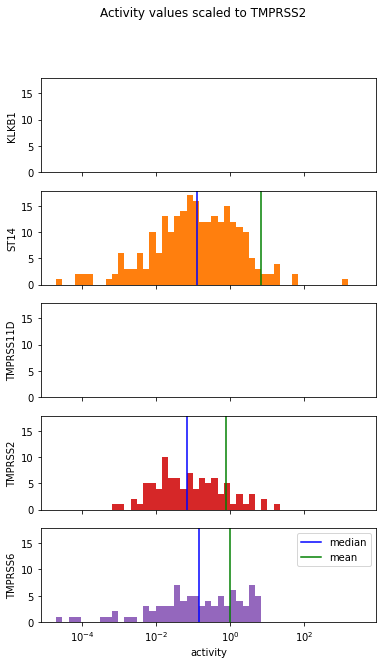

In [9]:
targets = data.groupby('target').acvalue_scaled_to_tmprss2.apply(list).to_dict()
fig, axes = plt.subplots(len(targets), 1, sharey=True, sharex=True)
fig.set_figheight(10)
axes = iter(axes)
colors = iter(plt.rcParams["axes.prop_cycle"].by_key()["color"])
for name, acvalues in targets.items():
    ax = next(axes)
    ax.hist(acvalues,
            bins=np.logspace(np.log10(data.acvalue_target.min()), np.log10(data.acvalue_target.max()), 50),
            color=next(colors))
    ax.set_xscale('log')
    ax.set_ylabel(name)
    ax.axvline(np.median(acvalues), color='b', label='median')
    ax.axvline(np.mean(acvalues), color='g', label='mean')
ax.set_xlabel('activity')
ax.legend()
plt.suptitle('Activity values scaled to TMPRSS2')
plt.show()

It appears that the linear regression and scaling is just a fancy way to put the distribution medians inline.  It does have more scientific merit, though, since the scaling only takes into account values from compounds which appear in both datasets.  Still, though, it suggests that if we would like to utilize all the data, including KLKB1 and ST14, it might be smart to scale the activities to match medians.  Definitely don't mean-scale the data though, since it appears to be mainly log-normally distributed.